# Comparing Numerical Variables

This first half of the project will focus on comparing the numerical variables to find correlations that can be compared against the categorical and qualitative variables in the dataset

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
os.getcwd()

'/Users/6c/Documents/Data Analyst Nanodegree/5th Project'

In [3]:
df = pd.read_csv('prosperLoanData.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

## First Impression

> because the dataframe has so many columns, the columns must be analyzed, understood and read to find out about the information they contain. 

In [5]:
pd.set_option('display.max_columns', 81)
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,CurrentlyInGroup,GroupKey,DateCreditPulled,CreditScoreRangeLower,CreditScoreRangeUpper,FirstRecordedCreditLine,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,IncomeRange,IncomeVerifiable,StatedMonthlyIncome,LoanKey,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,LoanOriginationDate,LoanOriginationQuarter,MemberKey,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
42789,D979360415441530403F885,1241514,2014-03-03 05:52:32.493000000,NaN,36,Current,NaN,0.08531,0.0716,0.0616,0.06044,0.0149,0.04554,7.0,AA,11.0,1,CT,Engineer - Electrical,Employed,69.0,True,False,NaN,2014-03-03 05:52:34,740.0,759.0,1980-11-28 00:00:00,10.0,9.0,18.0,6,255.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,12749.0,0.33,25052.0,17.0,1.00,1.0,0.09,"$100,000+",True,8750.000000,27B93707658732359029EE8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,134562,13000,2014-03-06 00:00:00,Q1 2014,CCAD3707425806319511A66,402.35,0.0000,0.00,0.0000,0.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
61744,C6D03509837085595EECD78,496008,2011-02-28 15:33:58.543000000,NaN,36,Completed,2013-07-01 00:00:00,0.35643,0.3199,0.3099,0.29570,0.1470,0.14870,2.0,E,4.0,7,WY,Principal,Employed,30.0,True,False,NaN,2011-02-28 15:33:39,720.0,739.0,1996-02-27 00:00:00,19.0,17.0,78.0,10,614.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,11640.0,0.44,11173.0,59.0,1.00,1.0,0.31,"$100,000+",True,8416.666667,40E13612411410190817748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,36,47582,3500,2011-03-07 00:00:00,Q1 2011,7E9B349344689685706EB8C,152.42,5355.6300,3500.00,1855.6300,-58.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,40
109357,73C33602677629643619DF7,1192307,2014-02-13 18:31:30.957000000,NaN,60,Current,NaN,0.19655,0.1725,0.1625,0.15163,0.0724,0.07923,4.0,C,4.0,1,CA,Other,Employed,108.0,True,False,NaN,2014-02-13 18:31:33,680.0,699.0,1996-08-10 00:00:00,9.0,9.0,28.0,6,301.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,11445.0,0.62,5109.0,28.0,0.82,1.0,0.10,"$100,000+",True,8333.333333,6CA8370626779578007CD4C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,1,133416,15000,2014-02-27 00:00:00,Q1 2014,11DD3706258576123B8D7AE,374.81,0.0000,0.00,0.0000,0.00,0.00,0.0,0.0,0.0,1.0,0,0,0.0,1
52587,AD9E3543926326374067DAB,576633,2012-04-08 21:13:11.223000000,NaN,36,Completed,2013-06-13 00:00:00,0.12782,0.0999,0.0899,0.08970,0.0330,0.05670,6.0,A,9.0,1,NC,Pharmacist,Employed,65.0,True,False,NaN,2012-03-24 21:35:05,840.0,859.0,1977-11-02 00:00:00,15.0,12.0,49.0,10,1086.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,28421.0,0.27,73677.0,46.0,1.00,1.0,0.25,"$100,000+",True,10833.333333,8D92364755281558356528E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,23,63997,20000,2012-04-20 00:00:00,Q2 2012,535535433333260770B8B7A,645.25,22178.0300,20000.00,2178.0300,-195.96,-859.74,0.0,0.0,0.0,1.0,0,0,0.0,336
32175,C1973419291054656B22601,310960,2008-04-15 08:49:57.100000000,D,36,Completed,2011-04-18 00:00:00,0.36204,0.3377,0.3277

Columns of Intrest:
1. Term
2. BorrowerAPR
3. BorrowerRate
4. LenderYield
5. BorrowerState
6. Occuptaion
7. IsBorrowerHomeowner
8. CreditScoreRangeLower
9. CreditScoreRangeUpper
10. CurrentCreditLines
11. OpenCreditLines
12. TotalCreditLinespast7years
13. CurrentDelinquencies
14. AmountDelinquent
15. DelinquenciesLast7Years
16. RevolvingCreditBalance
17. AvailableBankcardCredit
18. TradesNeverDelinquent (percentage)
19. DebtToIncomeRatio
20. IncomeRange
21. StatedMonthlyIncome
22. ProsperPrincipalBorrowed
23. LoanOriginalAmount
24. MonthlyLoanPayment
25. LP_CustomerPayments
26. LP_CustomerPrincipalPayments
27. LP_InterestandFees
28. Investors

# Feature Engineering

> Creating new columns as needed for data analysis

In [6]:
df['Credit_Score_Avg'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper']) / 2 
df['Annual_Income'] = df['StatedMonthlyIncome'] * 12

In [7]:
Interesting_columns = ['Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'LenderYield', 'BorrowerState', 'Occupation', 'IsBorrowerHomeowner',
                       'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
                       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 
                       'TradesNeverDelinquent (percentage)', 'DebtToIncomeRatio', 'IncomeRange', 'StatedMonthlyIncome', 'ProsperPrincipalBorrowed', 
                       'LoanOriginalAmount', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'Investors',
                        'Credit_Score_Avg', 'Annual_Income']


In [8]:
status_test = df[Interesting_columns]

In [9]:
df = status_test

In [10]:
loan_stats = df.describe()
loan_stats

,Term,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
count,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113240.000000,106315.000000,112947.000000,1.063330e+05,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113346.000000,1.139370e+05
mean,40.830248,0.218828,0.192764,0.182701,685.567731,704.567731,10.317192,9.260164,26.754539,0.592052,984.507059,4.154984,1.759871e+04,11210.225447,0.885897,0.275947,5.608026e+03,8472.311961,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,80.475228,695.067731,6.729631e+04
std,10.436212,0.080364,0.074818,0.074516,66.458275,66.458275,5.457866,5.022644,13.637871,1.978707,7158.270157,10.160216,3.293640e+04,19818.361309,0.148179,0.551759,7.478497e+03,7395.507650,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,103.239020,66.458275,8.974197e+04
min,12.000000,0.006530,0.000000,-0.010000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,1.000000,9.500000,0.000000e+00
25%,36.000000,0.156290,0.134000,0.124200,660.000000,679.000000,7.000000,6.000000,17.000000,0.000000,0.000000,0.000000,3.121000e+03,880.000000,0.820000,0.140000,3.200333e+03,3500.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,2.000000,669.500000,3.840400e+04
50%,36.000000,0.209760,0.184000,0.173000,680.000000,699.000000,10.000000,9.000000,25.000000,0.000000,0.000000,0.000000,8.549000e+03,4100.000000,0.940000,0.220000,4.666667e+03,6000.000000,6500.00000,217.740000,2583.830000,1587.500000,700.840100,44.000000,689.500000,5.600000e+04
75%,36.000000,0.283810,0.250000,0.240000,720.000000,739.000000,13.000000,12.000000,35.000000,0.000000,0.000000,3.000000,1.952100e+04,13180.000000,1.000000,0.320000,6.825000e+03,11000.000000,12000.00000,371.580000,5548.400000,4000.000000,1458.540000,115.000000,729.500000,8.190000e+04
max,60.000000,0.512290,0.497500,0.492500,880.000000,899.000000,59.000000,54.000000,136.000000,83.000000,463881.000000,99.000000,1.435667e+06,646285.000000,1.000000,10.010000,1.750003e+06,72499.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,1189.000000,889.500000,2.100004e+07


### Univariate Exploration

This exploration will start with the term of the loans. 
> It turns out that there are only 3 different terms, 12, 36 and 60 month loans, which is not very useful information

In [12]:
df.Term.value_counts()

36    87778
60    24545
12     1614
Name: Term, dtype: int64

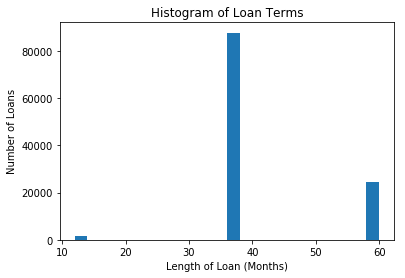

In [13]:
binsize = 2
bins = np.arange(12, 60+ binsize, binsize)
plt.hist(data = df, x = 'Term', bins = bins);
plt.xlabel('Length of Loan (Months)');
plt.ylabel('Number of Loans');
plt.title('Histogram of Loan Terms');

### The next item on the list is a distribution of the Borrower's APR; or: how much usury the bank is charging.
> The linear plot works for the distribution, while the log plot does not add any additional insights into Prosper Loan's APR information

>Becuase APR includes information such as the rate and other fees, the next column, BorrowerRate, will not be analysed

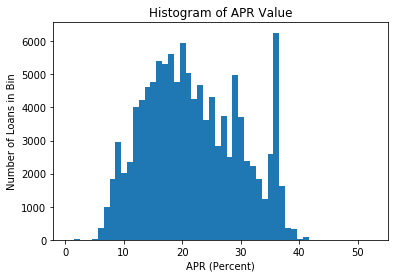

In [52]:
binsize = 0.01
bins = np.arange(0.006, 0.52+ binsize, binsize)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins);
plt.xlabel('APR (Percent)');
plt.ylabel('Number of Loans in Bin');
plt.title('Histogram of APR Value');
plt.xticks([0, 0.1, 0.2, 0.3, 0.4, 0.5], [0, 10, 20, 30, 40, 50]);

In [49]:
df.BorrowerAPR.value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
0.35356     721
0.29776     707
0.15833     652
0.24246     605
0.24758     601
0.12528     559
0.17359     549
0.15324     547
0.27462     534
0.27285     506
0.13799     489
0.15713     482
0.12691     456
0.25781     444
0.20735     433
0.26528     430
0.19501     425
0.20462     420
0.23318     416
0.15629     412
0.11296     409
0.34621     406
0.30564     399
0.20200     395
0.29537     391
           ... 
0.12251       1
0.01875       1
0.26122       1
0.21403       1
0.18292       1
0.25104       1
0.18294       1
0.34986       1
0.08732       1
0.23361       1
0.08979       1
0.16587       1
0.29130       1
0.15145       1
0.27174       1
0.14609       1
0.23969       1
0.11315       1
0.18494       1
0.09348       1
0.21535       1
0.27000       1
0.13951       1
0.08706       1
0.23014       1
0.22825       1
0.22955       1
0.24844       1
0.30775       1
0.11833       1
Name: BorrowerAPR, Lengt

Because the distribution is so clustered, a log plot was used to get a better idea of where the distribution is clustered.  The two highest value counts are 0.35797 and 0.35643 where the large spike occurs. 

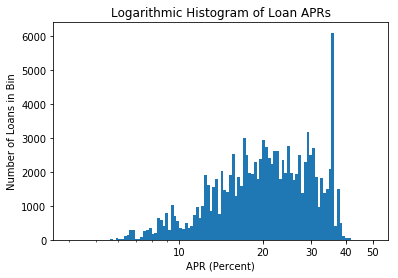

In [54]:
logbinsize = 0.01
logbins = 10** np.arange( -1.4, -0.301 +logbinsize, logbinsize)

plt.hist(data = df, x = 'BorrowerAPR', bins = logbins);
plt.xscale('log');

plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5], [10, 20, 30, 40, 50]);
plt.xlabel('APR (Percent)');
plt.ylabel('Number of Loans in Bin');
plt.title('Logarithmic Histogram of Loan APRs');

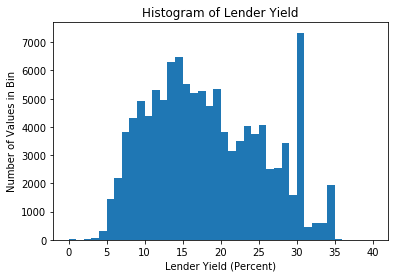

In [27]:
bins = np.arange(0, 0.4 + 0.01, 0.01);
plt.hist(data = df, x = 'LenderYield', bins = bins);

plt.xticks([0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4], [0, 5, 10, 15, 20, 25, 30, 35, 40]);
plt.xlabel('Lender Yield (Percent)');
plt.ylabel('Number of Values in Bin');
plt.title('Histogram of Lender Yield');

## You choose which info to create a histogram

This was going to be a program where you simply input the data which should be turned into a histogram, but the bin sizes could not be sorted into size categories which were appropriate.

In [21]:
def histogram_EDA(column):
    category = loan_stats[column]
    mini = category.loc['min']
    maxi = category.loc['max']
    
    if category.loc['std'] >= 1:
        numberofbins = 10
    elif category.loc['std'] < 1 and category.loc['std'] >= 0.75:
        numberofbins = 20
    elif category.loc['std'] < 0.75:
        numberofbins = 30
    
    #number of unique values: 0-10: 5
    #number of values: 10-50: 10
    #number of values:
    
    bin_size = round((maxi - mini)/ numberofbins, 3)
    bins = np.arange(mini, maxi + bin_size, bin_size)
    plt.hist(data = df, x = column, bins = bins);
    
    #calculate the number of bins based on nunique

## You Choose the Column
Input which column name you want to see a histogram for and it will be plotted

Input the name of the column where you want to create a histogram: 
Annual_Income


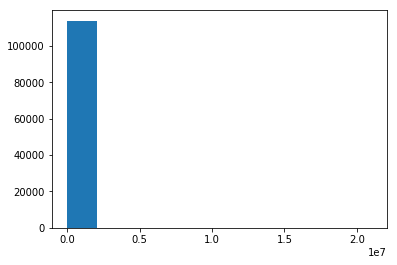

In [22]:
print('Input the name of the column where you want to create a histogram: ')
col_name = input()
histogram_EDA(col_name)


## Revolving Credit Balance

Because of the tail in the data, a Logarithmic scale was used to better show the variance in the column. The data appears to have a peak of 10^4 or a $10,000 revolving credit balance, which is the amount of the loan left unpaid after the billing cycle is complete.

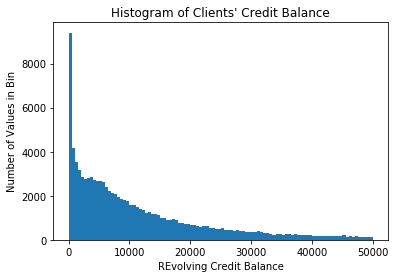

In [28]:
binsize = 500
bins = np.arange(0, 5e4 + binsize, binsize)
plt.hist(data = df, x = 'RevolvingCreditBalance', bins = bins);

plt.xlabel('Revolving Credit Balance');
plt.ylabel('Number of Values in Bin');
plt.title('Histogram of Clients\' Credit Balance');

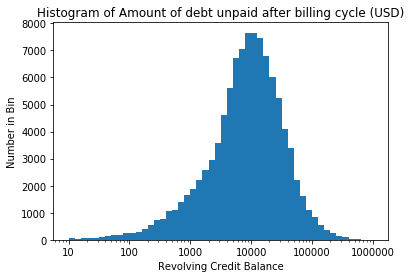

In [29]:
logbinsize = 0.1
logbins = 10** np.arange(1, 6 + logbinsize, logbinsize)

plt.hist(data = df, x = 'RevolvingCreditBalance', bins = logbins);
plt.xscale('log');
plt.xticks([1e1, 1e2, 1e3, 1e4, 1e5, 1e6],[10, 100, 1000, 10000, 100000, '1000000']);
plt.xlabel("Revolving Credit Balance");
plt.title("Histogram of Amount of debt unpaid after billing cycle (USD)");
plt.ylabel("Number in Bin");

## Credit Score Range

Created a column which calculated the the average credit score from the upper and lower credit score ranges of the different data sets.

There is a single datapoint in the credit score range which is 9.5, which is a huge outlier and should be removed.

In [30]:
df['Credit_Score_Avg'] = (df['CreditScoreRangeLower'] + df['CreditScoreRangeUpper']) / 2 
testdf = df['Credit_Score_Avg'] >= 10
testdf.describe()

count     113937
unique         2
top         True
freq      113213
Name: Credit_Score_Avg, dtype: object

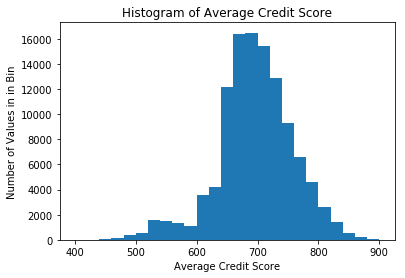

In [35]:
binsize = 20
bins = np.arange(400, 890 + binsize, binsize)
plt.hist(data = df, x = 'Credit_Score_Avg', bins = bins);

plt.xlabel("Average Credit Score");
plt.title("Histogram of Average Credit Score");
plt.ylabel("Number of Values in in Bin");

In [32]:
loan_stats

,Term,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
count,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113240.000000,106315.000000,112947.000000,1.063330e+05,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113346.000000,1.139370e+05
mean,40.830248,0.218828,0.192764,0.182701,685.567731,704.567731,10.317192,9.260164,26.754539,0.592052,984.507059,4.154984,1.759871e+04,11210.225447,0.885897,0.275947,5.608026e+03,8472.311961,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,80.475228,695.067731,6.729631e+04
std,10.436212,0.080364,0.074818,0.074516,66.458275,66.458275,5.457866,5.022644,13.637871,1.978707,7158.270157,10.160216,3.293640e+04,19818.361309,0.148179,0.551759,7.478497e+03,7395.507650,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,103.239020,66.458275,8.974197e+04
min,12.000000,0.006530,0.000000,-0.010000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,1.000000,9.500000,0.000000e+00
25%,36.000000,0.156290,0.134000,0.124200,660.000000,679.000000,7.000000,6.000000,17.000000,0.000000,0.000000,0.000000,3.121000e+03,880.000000,0.820000,0.140000,3.200333e+03,3500.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,2.000000,669.500000,3.840400e+04
50%,36.000000,0.209760,0.184000,0.173000,680.000000,699.000000,10.000000,9.000000,25.000000,0.000000,0.000000,0.000000,8.549000e+03,4100.000000,0.940000,0.220000,4.666667e+03,6000.000000,6500.00000,217.740000,2583.830000,1587.500000,700.840100,44.000000,689.500000,5.600000e+04
75%,36.000000,0.283810,0.250000,0.240000,720.000000,739.000000,13.000000,12.000000,35.000000,0.000000,0.000000,3.000000,1.952100e+04,13180.000000,1.000000,0.320000,6.825000e+03,11000.000000,12000.00000,371.580000,5548.400000,4000.000000,1458.540000,115.000000,729.500000,8.190000e+04
max,60.000000,0.512290,0.497500,0.492500,880.000000,899.000000,59.000000,54.000000,136.000000,83.000000,463881.000000,99.000000,1.435667e+06,646285.000000,1.000000,10.010000,1.750003e+06,72499.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,1189.000000,889.500000,2.100004e+07


In [33]:
df.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
83836,36,Current,0.20460,0.1675,0.1575,NE,Other,True,700.0,719.0,13.0,13.0,46.0,0.0,0.0,0.0,12900.0,255.0,1.00,0.37,"$50,000-74,999",5500.0,NaN,15000,532.93,0.0000,0.00,0.0000,1,709.5,66000.0
58003,36,Chargedoff,0.24689,0.2280,0.1930,MI,Other,False,440.0,459.0,NaN,NaN,11.0,7.0,NaN,2.0,NaN,NaN,NaN,0.12,Not displayed,1560.0,NaN,1000,38.61,267.3500,107.90,159.4500,27,449.5,18720.0
111536,36,Current,0.35797,0.3177,0.3077,OH,Professional,True,680.0,699.0,8.0,5.0,32.0,1.0,336.0,0.0,1775.0,0.0,0.60,0.22,"$25,000-49,999",3830.0,NaN,3500,151.99,2279.8500,1041.04,1238.8100,57,689.5,45960.0
50010,36,Current,0.28544,0.2469,0.2369,CA,Professional,False,640.0,659.0,6.0,4.0,41.0,0.0,0.0,5.0,4669.0,1981.0,0.81,0.11,"$100,000+",8500.0,NaN,9000,356.36,1062.9921,519.87,543.1221,1,649.5,102000.0
24642,36,Current,0.29363,0.2549,0.2449,GA,Other,True,640.0,659.0,7.0,7.0,14.0,0.0,0.0,8.0,6047.0,2191.0,0.83,0.30,"$50,000-74,999",4500.0,NaN,10000,400.19,2007.9300,981.20,1026.7300,41,649.5,54000.0


## Current Credit Lines

The number of current lines of credit that the borrowers have.  The list continues to 59, but was cut off at 40.
In the logarithmic plot, the most common number of values present is 10, which is a lot. Personally, I have 2, so two is a huge amount to me.

In [56]:
df.CurrentCreditLines.describe()

count    106333.000000
mean         10.317192
std           5.457866
min           0.000000
25%           7.000000
50%          10.000000
75%          13.000000
max          59.000000
Name: CurrentCreditLines, dtype: float64

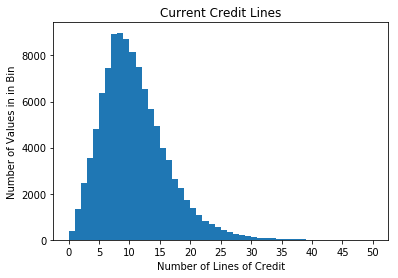

In [36]:
binsize = 1
bins = np.arange(0, 50 + binsize, binsize)
plt.hist(data = df, x = 'CurrentCreditLines', bins = bins);
plt.xticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50], [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
plt.xlabel('Number of Lines of Credit');
plt.title('Current Credit Lines');
plt.ylabel("Number of Values in in Bin");

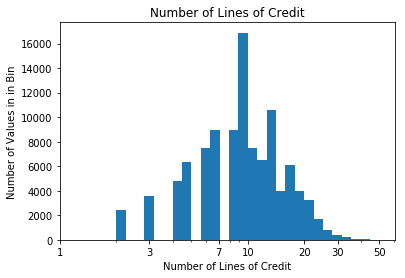

In [37]:
logbinsize = 0.05
logbins = 10** np.arange(0.1, 1.7 + logbinsize, logbinsize)

plt.hist(data = df, x = 'CurrentCreditLines', bins = logbins);
plt.xscale('log');
plt.xticks([1, 3, 7, 10, 20, 30, 50],[1, 3, 7, 10, 20, 30, 50]);
plt.xlabel("Number of Lines of Credit");
plt.title("Number of Lines of Credit");
plt.ylabel("Number of Values in in Bin");

## Current Delinquencies

With the vast number (89742) of delinquencies being 0, a histogram is not very practical for the number of delinquencies; either in log or linear format.

In [38]:
df.CurrentDelinquencies.value_counts()

0.0     89742
1.0     11716
2.0      4357
3.0      2098
4.0      1379
5.0       916
6.0       690
7.0       517
8.0       397
9.0       289
10.0      212
11.0      191
12.0      147
13.0      111
15.0       83
14.0       71
16.0       58
17.0       40
18.0       37
21.0       31
19.0       28
20.0       27
22.0       21
27.0       12
24.0       12
23.0        9
26.0        8
31.0        6
25.0        5
28.0        5
32.0        5
30.0        2
36.0        2
35.0        2
41.0        2
40.0        1
39.0        1
82.0        1
64.0        1
33.0        1
50.0        1
57.0        1
83.0        1
51.0        1
45.0        1
59.0        1
37.0        1
Name: CurrentDelinquencies, dtype: int64

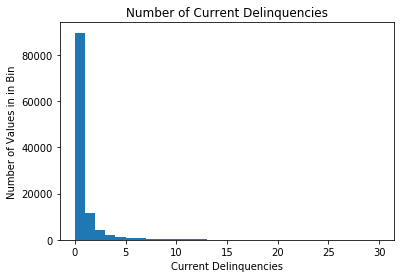

In [40]:
binsize = 1
bins = np.arange(0, 30 + binsize, binsize)
plt.hist(data = df, x = 'CurrentDelinquencies', bins = bins);
plt.xticks([0, 5, 10, 15, 20, 25, 30], [0, 5, 10, 15, 20, 25, 30])

plt.xlabel("Current Delinquencies");
plt.title("Number of Current Delinquencies");
plt.ylabel("Number of Values in in Bin");

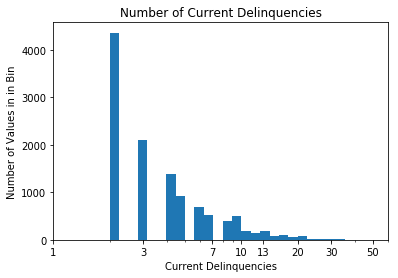

In [42]:
logbinsize = 0.05
logbins = 10** np.arange(0.1, 1.7 + logbinsize, logbinsize)

plt.hist(data = df, x = 'CurrentDelinquencies', bins = logbins);
plt.xscale('log');
plt.xticks([1, 3, 7, 10, 13, 20, 30, 50],[1, 3, 7, 10, 13, 20, 30, 50]);

plt.xlabel("Current Delinquencies");
plt.title("Number of Current Delinquencies");
plt.ylabel("Number of Values in in Bin");

## Available Bankcard Credit

Max credit card limit for the people in the dataset receiving the loans

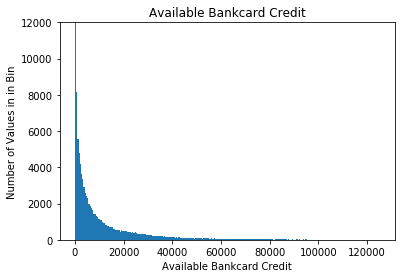

In [44]:
binsize = 500
bins = np.arange(0, 1.25e5 + binsize, binsize)
plt.hist(data = df, x = 'AvailableBankcardCredit', bins = bins);
#plt.xticks([0, 5, 10, 15, 20, 25, 30], [0, 5, 10, 15, 20, 25, 30])

plt.xlabel('Available Bankcard Credit');
plt.ylim(0, 12000);
plt.title('Available Bankcard Credit');
plt.ylabel("Number of Values in in Bin");

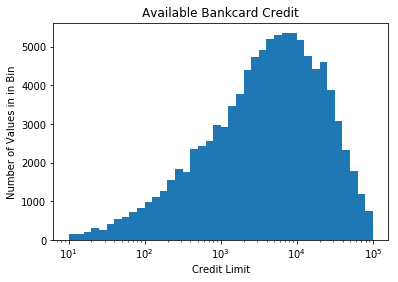

In [60]:
logbinsize = 0.1
logbins = 10** np.arange(1, 5 + logbinsize, logbinsize)

plt.hist(data = df, x = 'AvailableBankcardCredit', bins = logbins);
plt.xscale('log');
#plt.xticks([1, 3, 7, 10, 20, 30, 50],[1, 3, 7, 10, 20, 30, 50]);

plt.xlabel("Credit Limit");
plt.title("Available Bankcard Credit");
plt.ylabel("Number of Values in in Bin");

In [46]:
def sample_10000(dataframe):
    return dataframe.sample(10000) 

## Multivariable Exploration
Exploration will start with comparing varibles to the principal borrowed 
 
Because there are 113,000 loans, each of the plots will sample 10,000 loans to avoid clutter
> The only difference between the two very similar plots is that there are a lot of small (less than $5000) loans made to people with a smaller income who do not own a home

In [47]:
df_sample = df.sample(10000)

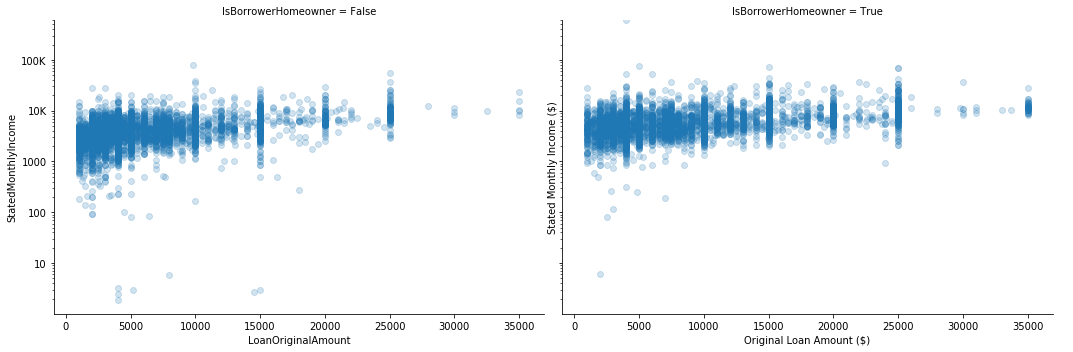

In [48]:
df_sample = df.sample(10000)
g = sb.FacetGrid(data = df_sample, col = 'IsBorrowerHomeowner', palette = 'viridis_r', height = 5, aspect = 1.5);
g.map(plt.scatter, 'LoanOriginalAmount', 'StatedMonthlyIncome', alpha = 0.2);
g.add_legend();
plt.yscale('log');
plt.yticks([10, 100, 1000, 10000, 1e5, 1e6], [10, 100, 1000, '10K', '100K']);
plt.ylim(1, 600000);
plt.ylabel('Stated Monthly Income ($)');
plt.xlabel('Original Loan Amount ($)')
plt.show()

## Multivariate Plot Matrices

In order to compare multiple variables and find the important variables sooner, plot matrices will be used to show multiple variables' comparisons.

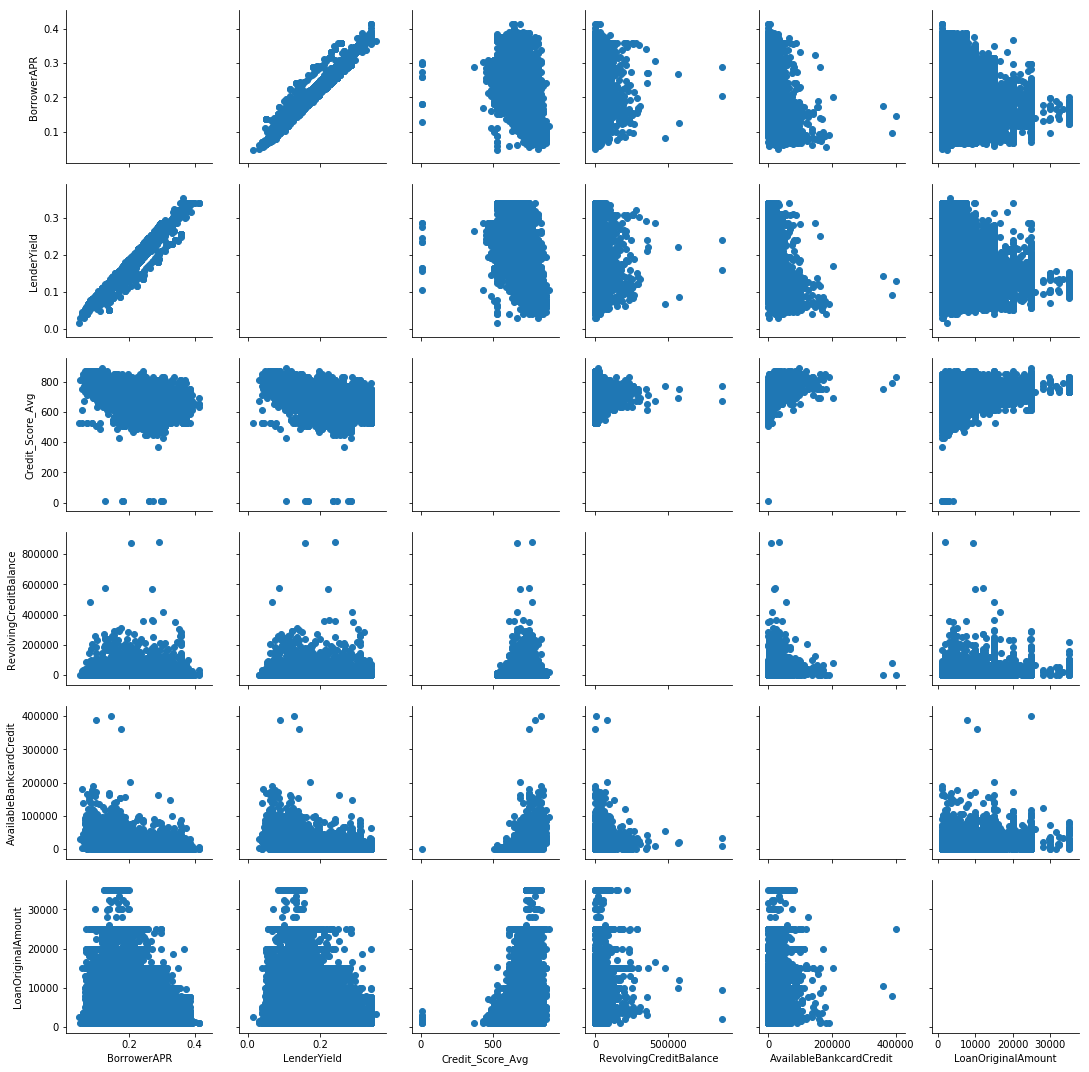

In [39]:
first_six = ['BorrowerAPR', 'LenderYield', 'Credit_Score_Avg', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'LoanOriginalAmount']
g = sb.PairGrid(data = df_sample, vars = first_six);

g.map_offdiag(plt.scatter);

## Heatmap of Sample Columns

> Because of the clutter in the map, a better way to get the information from the plot is to use the correlation values from the heatmap to find the related variables 

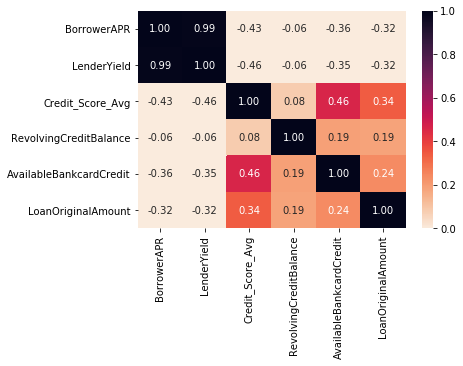

In [40]:
sb.heatmap(df_sample[first_six].corr(), cmap = 'rocket_r', annot = True, fmt = '0.2f', vmin = 0);

## Using Pandas plot matrix instead of Seaborn

> The issue with the pandas matrix is that it cannot be used to plot a heatmap and some of the tick marks have an absurd amount of decimal places

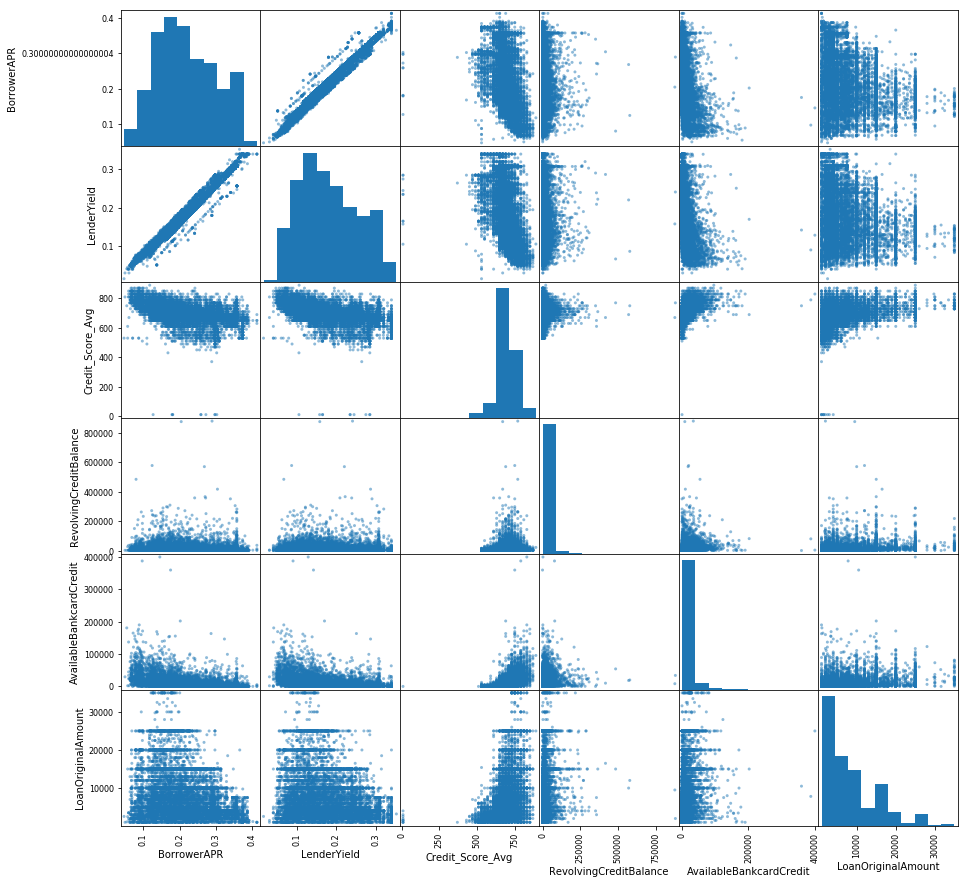

In [41]:
pd.plotting.scatter_matrix(df_sample[first_six], figsize = (15, 15));

## Second plot utilizing matrix plots

> Using the second group of columns to plot a matrix grid

This group of plots has a few areas with very high correlation values, but the values are with columns that are very closeley related: Number of credit lines in the last 7 years and and current open credit lines. 

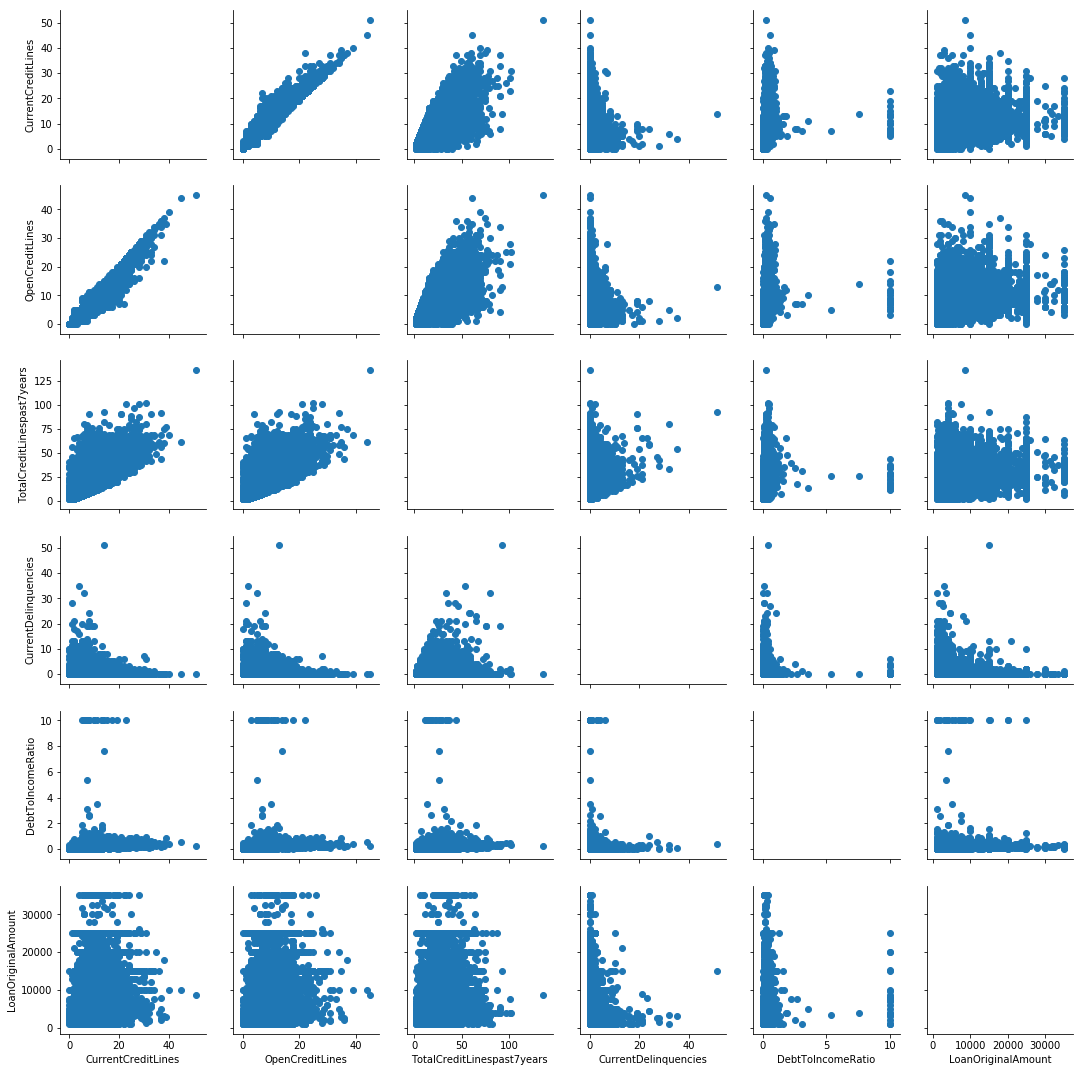

In [44]:
second_six = ['CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies', 'DebtToIncomeRatio', 'LoanOriginalAmount']

g = sb.PairGrid(data = df_sample, vars = second_six);
g.map_offdiag(plt.scatter);
#g.map_diag(plt.hist);


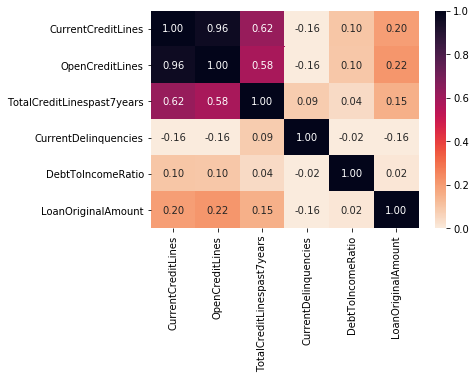

In [45]:
sb.heatmap(df_sample[second_six].corr(), cmap = 'rocket_r', annot = True, fmt = '0.2f', vmin = 0);

In [46]:
loan_stats

,Term,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
count,113937.000000,113912.000000,113937.000000,113937.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113240.000000,106315.000000,112947.000000,1.063330e+05,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113346.000000,1.139370e+05
mean,40.830248,0.218828,0.192764,0.182701,685.567731,704.567731,10.317192,9.260164,26.754539,0.592052,984.507059,4.154984,1.759871e+04,11210.225447,0.885897,0.275947,5.608026e+03,8472.311961,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,80.475228,695.067731,6.729631e+04
std,10.436212,0.080364,0.074818,0.074516,66.458275,66.458275,5.457866,5.022644,13.637871,1.978707,7158.270157,10.160216,3.293640e+04,19818.361309,0.148179,0.551759,7.478497e+03,7395.507650,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,103.239020,66.458275,8.974197e+04
min,12.000000,0.006530,0.000000,-0.010000,0.000000,19.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,1.000000,9.500000,0.000000e+00
25%,36.000000,0.156290,0.134000,0.124200,660.000000,679.000000,7.000000,6.000000,17.000000,0.000000,0.000000,0.000000,3.121000e+03,880.000000,0.820000,0.140000,3.200333e+03,3500.000000,4000.00000,131.620000,1005.760000,500.890000,274.870000,2.000000,669.500000,3.840400e+04
50%,36.000000,0.209760,0.184000,0.173000,680.000000,699.000000,10.000000,9.000000,25.000000,0.000000,0.000000,0.000000,8.549000e+03,4100.000000,0.940000,0.220000,4.666667e+03,6000.000000,6500.00000,217.740000,2583.830000,1587.500000,700.840100,44.000000,689.500000,5.600000e+04
75%,36.000000,0.283810,0.250000,0.240000,720.000000,739.000000,13.000000,12.000000,35.000000,0.000000,0.000000,3.000000,1.952100e+04,13180.000000,1.000000,0.320000,6.825000e+03,11000.000000,12000.00000,371.580000,5548.400000,4000.000000,1458.540000,115.000000,729.500000,8.190000e+04
max,60.000000,0.512290,0.497500,0.492500,880.000000,899.000000,59.000000,54.000000,136.000000,83.000000,463881.000000,99.000000,1.435667e+06,646285.000000,1.000000,10.010000,1.750003e+06,72499.000000,35000.00000,2251.510000,40702.390000,35000.000000,15617.030000,1189.000000,889.500000,2.100004e+07


In [47]:
df.sample(5)

,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,BorrowerState,Occupation,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
12347,36,Completed,0.24507,0.2300,0.2100,CA,Other,False,520.0,539.0,5.0,4.0,8.0,0.0,0.0,2.0,1405.0,245.0,0.42,0.09,"$1-24,999",1833.333333,NaN,2800,108.39,3861.1000,2800.04,1061.0600,85,529.5,22000.0
25035,36,Past Due (91-120 days),0.35797,0.3177,0.3077,FL,Administrative Assistant,True,660.0,679.0,11.0,11.0,19.0,1.0,33.0,0.0,10648.0,3170.0,0.87,0.31,"$50,000-74,999",4333.333333,NaN,4000,173.71,3111.7800,1473.11,1638.6700,9,669.5,52000.0
93983,36,Past Due (1-15 days),0.18479,0.1485,0.1385,NY,NaN,False,720.0,739.0,11.0,11.0,17.0,0.0,0.0,0.0,8622.0,2136.0,1.00,0.44,"$25,000-49,999",3166.666667,NaN,10000,345.92,1383.6800,900.05,483.6300,176,729.5,38000.0
13855,36,Current,0.13799,0.1099,0.0999,NY,Professional,False,740.0,759.0,5.0,5.0,6.0,0.0,0.0,0.0,16588.0,23412.0,1.00,0.08,"$100,000+",12500.000000,NaN,25000,818.35,3265.8726,2380.45,885.4226,1,749.5,150000.0
103546,36,Current,0.22773,0.1905,0.1805,PA,Analyst,False,700.0,719.0,7.0,6.0,21.0,0.0,0.0,0.0,12839.0,2911.0,1.00,0.17,"$75,000-99,999",6416.666667,NaN,22000,806.99,7200.0000,7073.70,126.3000,1,709.5,77000.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 31 columns):
Term                                  113937 non-null int64
LoanStatus                            113937 non-null object
BorrowerAPR                           113912 non-null float64
BorrowerRate                          113937 non-null float64
LenderYield                           113937 non-null float64
BorrowerState                         108422 non-null object
Occupation                            110349 non-null object
IsBorrowerHomeowner                   113937 non-null bool
CreditScoreRangeLower                 113346 non-null float64
CreditScoreRangeUpper                 113346 non-null float64
CurrentCreditLines                    106333 non-null float64
OpenCreditLines                       106333 non-null float64
TotalCreditLinespast7years            113240 non-null float64
CurrentDelinquencies                  113240 non-null float64
AmountDelinquent             

### Breaking up the useable columns into groups

> Taking the important columns and breaking them up into groups for the grid plots

The final group of plots in the series has more of the higher correlation values; however, these values are all very closely related: Principal Payments and customer payments, interest and fees and customer payments, as well as customer payments and principal payments.

In [49]:
first_six = ['BorrowerAPR', 'LenderYield', 'Credit_Score_Avg', 'RevolvingCreditBalance', 'AvailableBankcardCredit', 'LoanOriginalAmount']
second_six = ['CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years', 'CurrentDelinquencies', 'DebtToIncomeRatio', 'LoanOriginalAmount']
third_set = ['MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'Investors', 'LoanOriginalAmount']


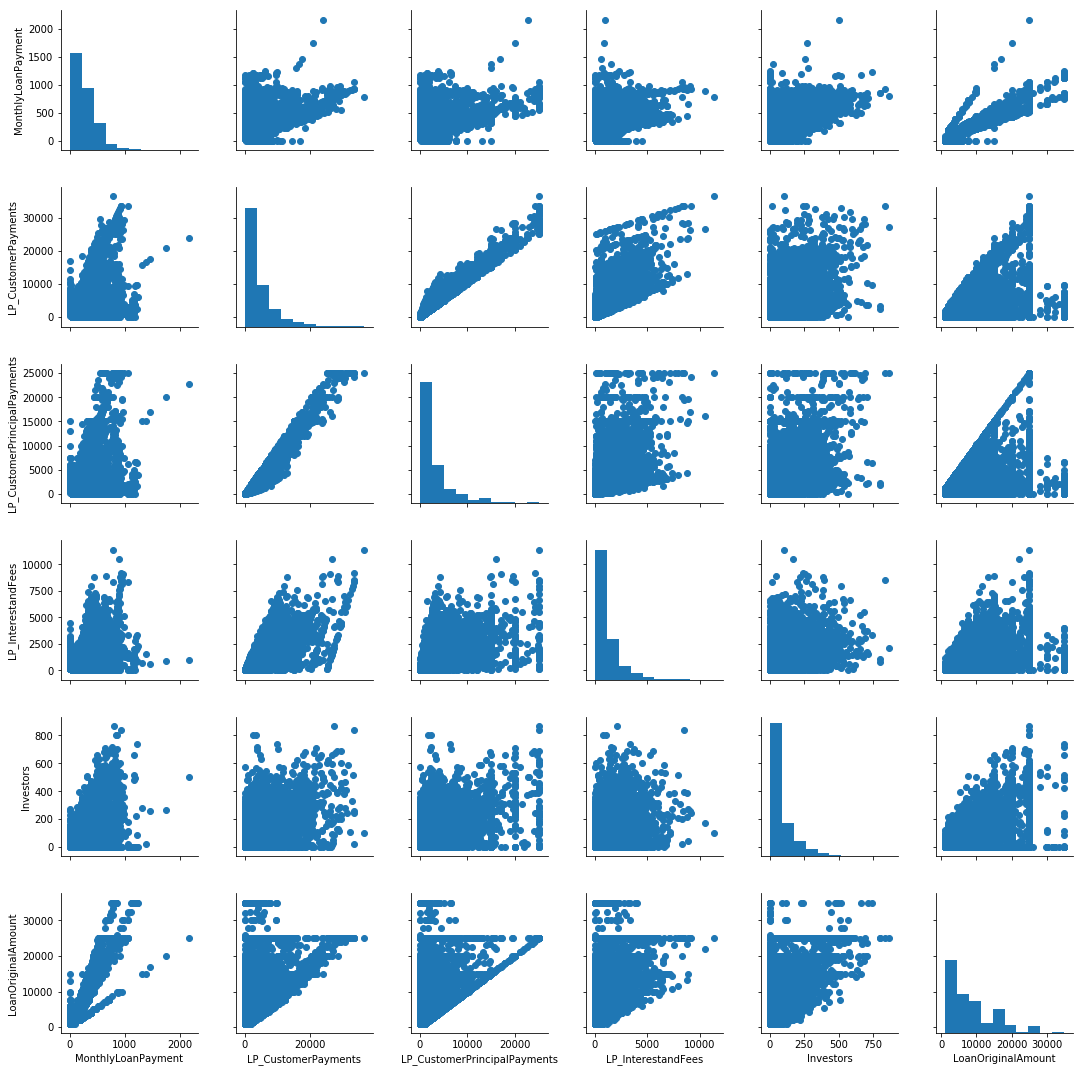

In [50]:
g = sb.PairGrid(data = df_sample, vars = third_set);
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist);

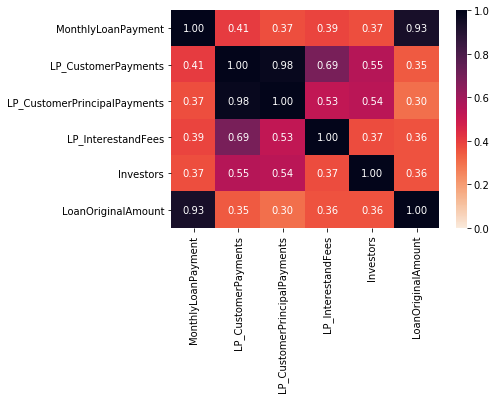

In [51]:
sb.heatmap(df_sample[third_set].corr(), cmap = 'rocket_r', annot = True, fmt = '0.2f', vmin = 0);

# Heatmap for all Columns

Instead of creating heatmaps six at a time, create maps for all the variables in the dataset

This is a much more efficient way of finding correlation values between all the values as opposed to scatter plots.  It also allows for a much cleaner, easier way to look at all of the data at the same time.

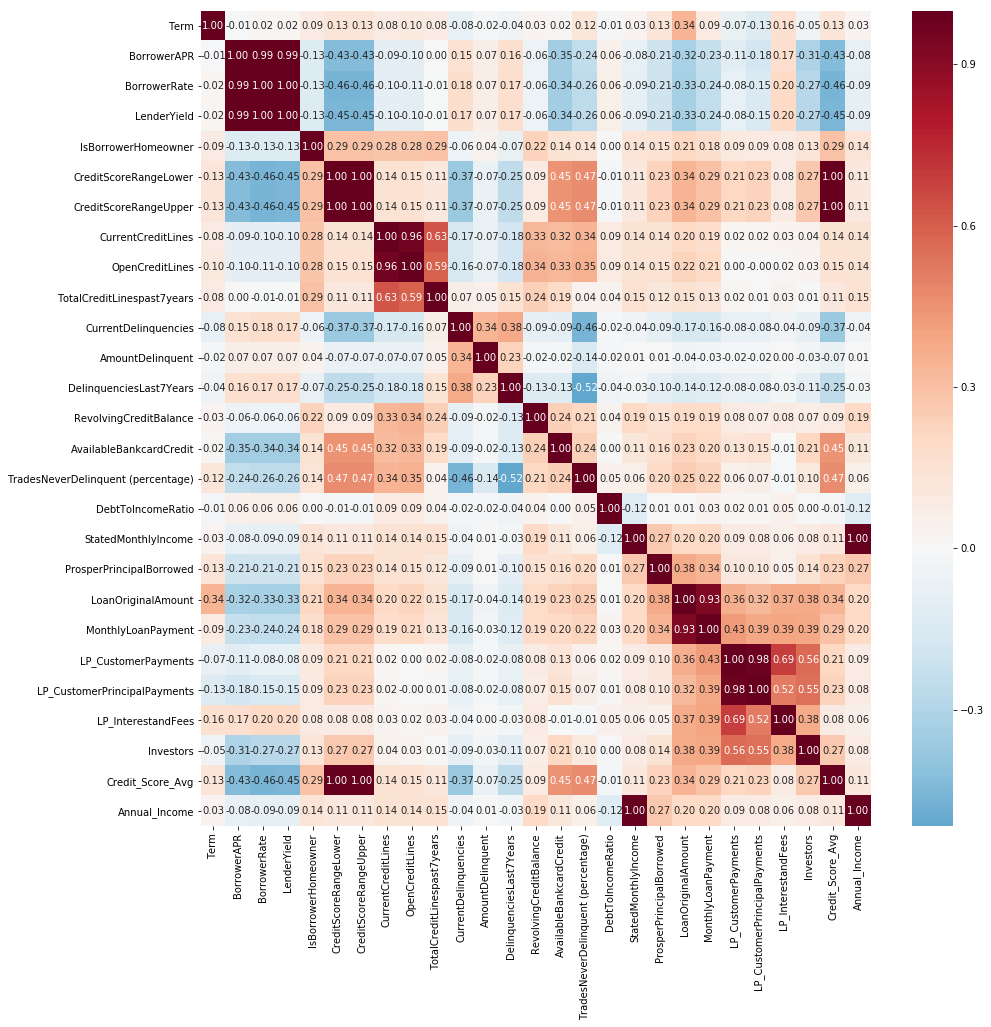

In [63]:
plt.subplots(figsize = (15, 15));
sb.heatmap(df[Interesting_columns].corr(), cmap = 'RdBu_r', center = 0, annot = True, fmt = '0.2f');
#fig.suptitle('Loan Attributes Correlation Heatmap', fontsize=10, fontweight='bold');

#cmap = sb.diverging_palette(220, 10, as_cmap=True)
#sb.heatmap(df1.iloc[:, 1:6:], annot=True, linewidths=.5, ax=ax)

# Correlations between values greater than |0.3|

> A list of the values with high correlation values that are not related (e.g. Upper and Lower Credit Score Range)

The list was turned into a dataframe which was sorted to remove all duplicates and rows where the valuables would be related

In [64]:
test_corr = df[Interesting_columns].corr()
test_corr.round(3)
#test_corr = test_corr.to_dict('index')
test_corr

,Term,BorrowerAPR,BorrowerRate,LenderYield,IsBorrowerHomeowner,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,RevolvingCreditBalance,AvailableBankcardCredit,TradesNeverDelinquent (percentage),DebtToIncomeRatio,StatedMonthlyIncome,ProsperPrincipalBorrowed,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,Investors,Credit_Score_Avg,Annual_Income
Term,1.000000,-0.011183,0.020085,0.020556,0.085339,0.126263,0.126263,0.077072,0.096309,0.076528,-0.083807,-0.016459,-0.041492,0.026022,0.015348,0.119342,-0.014670,0.028479,0.130493,0.338927,0.091026,-0.069696,-0.128255,0.158890,-0.045137,0.126263,0.028479
BorrowerAPR,-0.011183,1.000000,0.989824,0.989329,-0.132823,-0.429707,-0.429707,-0.093481,-0.098860,0.002513,0.149404,0.065679,0.162225,-0.058539,-0.348926,-0.241349,0.056327,-0.082338,-0.206209,-0.322887,-0.226653,-0.111350,-0.180445,0.169726,-0.307606,-0.429707,-0.082338
BorrowerRate,0.020085,0.989824,1.000000,0.999211,-0.134431,-0.461567,-0.461567,-0.097473,-0.105998,-0.005793,0.176530,0.065645,0.170279,-0.059608,-0.343861,-0.261189,0.062917,-0.088982,-0.206461,-0.328960,-0.244742,-0.081055,-0.153722,0.200479,-0.274217,-0.461567,-0.088982
LenderYield,0.020556,0.989329,0.999211,1.000000,-0.132993,-0.454350,-0.454350,-0.096318,-0.104790,-0.005470,0.171854,0.065021,0.168000,-0.058665,-0.340939,-0.256283,0.061942,-0.088208,-0.206725,-0.328455,-0.244214,-0.079052,-0.151563,0.201162,-0.274174,-0.454350,-0.088208
IsBorrowerHomeowner,0.085339,-0.132823,-0.134431,-0.132993,1.000000,0.293516,0.293516,0.278295,0.279033,0.293587,-0.055454,0.038122,-0.070798,0.224649,0.142039,0.137122,0.000177,0.140051,0.148501,0.206787,0.179703,0.094572,0.089186,0.076168,0.125093,0.293516,0.140051
CreditScoreRangeLower,0.126263,-0.429707,-0.461567,-0.454350,0.293516,1.000000,1.000000,0.142092,0.148210,0.108707,-0.368450,-0.065849,-0.251219,0.088848,0.453257,0.468899,-0.013169,0.107901,0.231863,0.340874,0.292532,0.210125,0.225058,0.076810,0.271350,1.000000,0.107901
CreditScoreRangeUpper,0.126263,-0.429707,-0.461567,-0.454350,0.293516,1.000000,1.000000,0.142092,0.148210,0.108707,-0.368450,-0.065849,-0.251219,0.088848,0.453257,0.468899,-0.013169,0.107901,0.231863,0.340874,0.292532,0.210125,0.225058,0.076810,0.271350,1.000000,0.107901
CurrentCreditLines,0.077072,-0.093481,-0.097473,-0.096318,0.278295,0.142092,0.142092,1.000000,0.960409,0.627594,-0.165860,-0.072590,-0.180398,0.333656,0.318165,0.338103,0.091878,0.143329,0.142210,0.201383,0.186922,0.022195,0.018597,0.025585,0.039449,0.142092,0.143329
OpenCreditLines,0.096309,-0.098860,-0.105998,-0.104790,0.279033,0.148210,0.148210,0.960409,1.000000,0.586731,-0.161929,-0.070437,-0.181438,0.342742,0.331721,0.349783,0.090212,0.143035,0.154561,0.223681,0.205010,0.003471,-0.000480,0.015574,0.025211,0.148210,0.143035
TotalCreditLinespast7years,0.076528,0.002513,-0.005793,-0.005470,0.293587,0.108707,0.108707,0.627594,0.586731,1.000000,0.067601,0.050984,0.146574,0.237530,0.194360,0.044294,0.037486,0.149552,0.115169,0.145012,0.134829,0.017492,0.010455,0.034835,0.008226,0.108707,0.149552


In [66]:
#Get the correct number of terms in each of the labels for the new data frame
index_list = test_corr.index
val_list = test_corr.values.tolist()
val_list = [item for sublist in val_list for item in sublist]
x_list = test_corr.index.tolist()
y_list = np.repeat(index_list,27)
x_list = x_list * 27

In [67]:
corr_dict = {'Value': val_list, 'x_axis': y_list, 'y_axis': x_list}
df_corr = pd.DataFrame.from_dict(corr_dict)

In [68]:
df_corr.sample(10)

,Value,x_axis,y_axis
696,0.210125,Credit_Score_Avg,LP_CustomerPayments
647,0.063166,LP_InterestandFees,Annual_Income
702,0.028479,Annual_Income,Term
202,0.333656,CurrentCreditLines,RevolvingCreditBalance
534,0.364831,LoanOriginalAmount,LP_CustomerPayments
460,-0.082338,StatedMonthlyIncome,BorrowerAPR
699,0.271350,Credit_Score_Avg,Investors
617,0.518203,LP_CustomerPrincipalPayments,LP_InterestandFees
487,-0.206209,ProsperPrincipalBorrowed,BorrowerAPR
52,-0.429707,BorrowerAPR,Credit_Score_Avg


### Remove Rows from New Dataframe
Removing rows that are very similar and would have a very high correlation because they are closely related such as upper and lower credit score ranges, principal payments and customer principal payments, and borrower rate and borrower APR.

In [219]:
df_corr = df_corr.query('Value != 1')
df_corr = df_corr.query('abs(Value) >= 0.3')
df_corr = df_corr.query('x_axis != "CreditScoreRangeLower"')
df_corr = df_corr.query('x_axis != "CreditScoreRangeUpper"')
df_corr = df_corr.query('y_axis != "CreditScoreRangeLower"')
df_corr = df_corr.query('y_axis != "CreditScoreRangeUpper"')

df_corr = df_corr.query('y_axis != "CreditScoreRangeUpper" and x_axis != "CreditScoreRangeLower"')
df_corr = df_corr.query('y_axis != "CreditScoreRangeLower" and x_axis != "CreditScoreRangeUpper"')

df_corr = df_corr.query('y_axis != "BorrowerRate" and x_axis != "BorrowerAPR"')
df_corr = df_corr.query('y_axis != "BorrowerAPR" and x_axis != "BorrowerRate"')

df_corr = df_corr.query('y_axis != "StatedMonthlyIncome" and x_axis != "Annual_Income"')
df_corr = df_corr.query('y_axis != "Annual_Income" and x_axis != "StatedMonthlyIncome"')

df_corr = df_corr.query('y_axis != "LP_CustomerPayments" and x_axis != "LP_CustomerPrincipalPayments"')
df_corr = df_corr.query('y_axis != "LP_CustomerPrincipalPayments" and x_axis != "LP_CustomerPayments"')

df_corr = df_corr.query('y_axis != "OpenCreditLines" and x_axis != "CurrentCreditLines"')
df_corr = df_corr.query('y_axis != "CurrentCreditLines" and x_axis != "OpenCreditLines"')

df_corr.drop_duplicates(subset = "Value", keep = 'first', inplace = True)

df_corr['Value'] = df_corr['Value'].abs()
df_corr = df_corr.sort_values('Value', ascending = False)
#df_corr.reset_index(inplace = True)
print(df_corr.shape)

df_corr


(20, 3)


,Value,x_axis,y_axis
0,0.931984,LoanOriginalAmount,MonthlyLoanPayment
1,0.516443,DelinquenciesLast7Years,TradesNeverDelinquent (percentage)
2,0.468899,TradesNeverDelinquent (percentage),Credit_Score_Avg
3,0.458761,CurrentDelinquencies,TradesNeverDelinquent (percentage)
4,0.454350,LenderYield,Credit_Score_Avg
5,0.453257,AvailableBankcardCredit,Credit_Score_Avg
6,0.390476,MonthlyLoanPayment,LP_InterestandFees
7,0.387409,MonthlyLoanPayment,Investors
8,0.382268,ProsperPrincipalBorrowed,LoanOriginalAmount
9,0.382127,LP_InterestandFees,Investors


In [220]:
#Saving the Dataframe to a csv file so the data can be used in the next notebook
df_corr.to_csv('Correlation_Values.csv')


In [221]:
# Saving the dataframe as a 
df.to_csv('Focused_Bank_Info.csv')